# Configurações Prévias do Documento

Para a operacionalização da análise socio-econômica, nesta seção ***Notebook Jupyter*** são feitas as primeiras configurações necessárias, tais como *importações de bibliotecas* (Pandas, NumPy, Matplotlib e Seaborn), *configuração de exposição de gráficos* *in line* e em estilos *Seaborn*, opção por *padrão numérico* em *Pandas DataFrames*, escolha do *município de interesse* para análise etc.

In [1]:
# Importação de bibliotecas necessárias para as análises
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import locale
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Configuração de DataFrame Pandas para formato numérico com duas casas decimais quando a coluna for float
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.float_format', '{:,}'.format)


# A opção abaixo aplica o locale para o data_frame, mas não para integers, somente para floats. 
# Preciso aprender a aplicar isso também para integers
# pd.set_option('display.float_format', lambda x: locale.format('%.2f', x, grouping=True))


# Configuração de Gráficos para padrão de formatação básica da biblioteca Seaborn
sns.set()

# Configuração de Gráficos para padrão que apareçam in line, no interior das células
%matplotlib inline

# Configuração para que o Jupyter sugira formas de autocompletar as linhas de código
%config IPCompleter.greedy = False

# Configuração das Células para que apresentam múltiplos resultados em vez de apenas o último
InteractiveShell.ast_node_interactivity = "all"

# A função abaixo estabelece as configurações de sistema para datas, moeda, separadosres de milhares e decimais.
locale.setlocale(locale.LC_ALL, '');




# A função locale.localeconv() mostra todas as opções do sistema para datas,  moeda, separadosres de milhares etc. 
# No entanto, isso não se aplica imediatamente para os dataframes ou para os gráficos. Preciso estudar isso.

**Diretórios do Projeto**

Abaixo se encontram os diretórios básicos do projeto, nos quais se encontram os arquivos com os dados para a análise de cada temma.

In [3]:
diretorioeconomia = os.path.join(os.getcwd(),'economia')
diretoriodesigualdade = os.path.join(os.getcwd(),'desigualdade')
diretorioeducacao = os.path.join(os.getcwd(),'educacao')
diretoriodemografia = os.path.join(os.getcwd(),'demografia')
diretoriosaude = os.path.join(os.getcwd(),'saude')
diretorioterritorio = os.path.join(os.getcwd(),'territorio')

In [3]:
# As variáveis abaixo estabelecem o nome do Município de Interesse, seu código e estado.
# Essas variáveis são utilizadas como parâmetros para as consultas de dados, para filtros, títulos de tabelas,
# além textos nas células markown.

# estadodeinteresse = 'PR'
# nomemunicipiodeinteresse = 'São José dos Pinhais'
# municipiodeinteresse = 4125506

In [3]:
# importação da estrutura territorial brasileira considerada

pd_municipios = pd.read_csv('data/te755rritorio/municipios_brasileiros.csv', ';')
pd_municipios['municipionormalizado'] = pd_municipios['municipio'].str.lower()

In [10]:
pd_municipios

,uf,municipio,cod,municipionormalizado
0,RO,Alta Floresta D'Oeste,1100015,alta floresta d'oeste
1,RO,Ariquemes,1100023,ariquemes
2,RO,Cabixi,1100031,cabixi
3,RO,Cacoal,1100049,cacoal
4,RO,Cerejeiras,1100056,cerejeiras
...,...,...,...,...
5561,GO,Vianópolis,5222005,vianópolis
5562,GO,Vicentinópolis,5222054,vicentinópolis
5563,GO,Vila Boa,5222203,vila boa
5564,GO,Vila Propício,5222302,vila propício


Ponta Grossa 4119905
São José dos Pinhais 4125506
Curitiba 4106902
Maringá

In [192]:
municipiodeinteresse = 4106902
nomemunicipiodeinteresse = 'Curitiba'
estadodeinteresse = 'PR'

As operações computacionais utilizadas no presente relatório servem-se de três variáveis Python com seus respectivos valores, a saber:
* municipiodeinteresse: {{municipiodeinteresse}}
* nomemunicipiodeinteresse: {{nomemunicipiodeinteresse}}
* estadodeinteresse: {{estadodeinteresse}}

# Demografia

A compreensão do comportamento demográfico é um dos elementos fundamentais para o planejamento urbano-regional. Padrões de concentração populacional, de movimentos migratórios, de composição etária, de pendularidade, entre outros indicadores, servem como base para a identificação de oportunidades para desenvolvimento, demandas por serviços públicos de saúde, educação, segurança, bem como infraestruturas diversas voltadas para integração e dinamização do desenvolvimento urbano.
Por essa razão, adiante, para {{nomemunicipiodeinteresse}}, são apresentadas análises acerca de parâmetros demográficos básicos e, em seguida, análises sobre as consequências do crescimento populacional previsto para as próximas décadas na demanda por serviços públicos, investimento e emprego.

* **padrão do crescimento populacional nas últimas décadas;**
* **projeção populacional;**
* **identificação do padrão de densidades demográficas;**
* **estrutura etária da população;**
* **dinâmicas migratórias;**
* **dados de mobilidade pendular para o trabalho e estudo.**


## Crescimento Demográfico

### Obtenção e Tratamento dos dados

Para a análise do padrão de crescimento demográfico no município de **{{nomemunicipiodeinteresse}}**, foram obtidos dados censitários por meio do banco de dados Sistema IBGE de Recuperação Automática e armazenados em formato CSV. Os dados foram carregados neste *Notebook* por meio de biblioteca Python Pandas. Carregados como Pandas DataFrame, os dados foram preliminarmente observados, buscando-se identificar os formatos de colunas e a presença de valores nulos. Os **valores nulos encontrados foram eliminados**, pois correspondiam a anos em que determinados municípios ainda não existiam, e as **colunas foram reformatadas** para que seus tipos correspondecem adequadamente a números integrais ou categorias textuais, conforme o caso. Adiante os procedimentos são apresentados.

In [10]:
# Carregamento do arquivo contendo dados populacionais entre 1970 e 2010 para DataFrame Pandas.
# usar separador ;
pop_urb_rur = pd.read_csv('data/pop/pop_urbano_rural_total_70_10.csv', sep= ';')

**Observação preliminar do topo e da base do DataFrame.**

In [11]:
# head
pop_urb_rur.head()

,codmun,nomemun,ano,Total,Urbana,Rural
0,1100015,Alta Floresta D'Oeste,1970,nan,nan,nan
1,1100023,Ariquemes,1970,nan,nan,nan
2,1100031,Cabixi,1970,nan,nan,nan
3,1100049,Cacoal,1970,nan,nan,nan
4,1100056,Cerejeiras,1970,nan,nan,nan


In [12]:
# tail
pop_urb_rur.tail()

,codmun,nomemun,ano,Total,Urbana,Rural
27825,5222005,Vianópolis,2010,12548.00,9170.00,3378.00
27826,5222054,Vicentinópolis,2010,7371.00,6321.00,1050.00
27827,5222203,Vila Boa,2010,4735.00,3502.00,1233.00
27828,5222302,Vila Propício,2010,5145.00,1504.00,3641.00
27829,5300108,Brasília,2010,2570160.00,2481272.00,88888.00


**Estrutura do DataFrame**

In [13]:
# Variáveis contendo o número de linhas e colunas do Data Frame pop_urb_rur (shape)
pop_urb_rur.shape

(27830, 6)

In [14]:
# Análise da estrutura dos dados (número de linhas, nome das colunas, tipos de dados automaticamente inseridos etc.)
# Alguns dados se encontravam em formatos que não eram os mais convenientes para o trabalho
# que deveriam ser números inteiros (integers), estão representados como decimais (floats).
# info

pop_urb_rur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27830 entries, 0 to 27829
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   codmun   27830 non-null  int64  
 1   nomemun  27830 non-null  object 
 2   ano      27830 non-null  int64  
 3   Total    23506 non-null  float64
 4   Urbana   23506 non-null  float64
 5   Rural    23506 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ MB


**VALORES NULOS**.<br>

O número de linhas com valores nulos por cada coluna do _Data Frame_ se encontra na lista abaixo:

In [15]:
# isnull()
# sum()

pop_urb_rur.isnull().sum()

codmun        0
nomemun       0
ano           0
Total      4324
Urbana     4324
Rural      4324
dtype: int64

Os valores nulos foram retirados e os tipos de dados das colunas foram alterados, conforme os códigos abaixo: 

> ```Python
dfpop_urb_rur.dropna(inplace=True)
```
> ```Python
pop_urb_rur = pop_urb_rur.astype({
    'codmun': 'object',
    'nomemun': 'object',
    'ano': 'int32',
    'Total': 'int32',
    'Urbana': 'int32',
    'Rural': 'int32'
})
```

In [16]:
# Código para retirada de valores nulos

pop_urb_rur.dropna(inplace=True)

In [17]:
# Código para estabelecimento dos formatos das colunas

pop_urb_rur = pop_urb_rur.astype({
    'codmun': 'object',
    'nomemun': 'object',
    'ano': 'int32',
    'Total': 'int32',
    'Urbana': 'int32',
    'Rural': 'int32'
})

**Observação do topo do DataFrame após as alterações.**

In [18]:
# Observação do topo o DataFrame após alterações.
display(pop_urb_rur.head())

,codmun,nomemun,ano,Total,Urbana,Rural
9,1100106,Guajará-Mirim,1970,27016,11719,15297
16,1100205,Porto Velho,1970,84048,47888,36160
54,1200104,Brasiléia,1970,12311,2664,9647
57,1200203,Cruzeiro do Sul,1970,43584,9610,33974
59,1200302,Feijó,1970,15768,2256,13512


**Observação da base do DataFrame após as alterações.**

In [19]:
# Observação da base do DataFrame após alterações.
display(pop_urb_rur.tail())

,codmun,nomemun,ano,Total,Urbana,Rural
27825,5222005,Vianópolis,2010,12548,9170,3378
27826,5222054,Vicentinópolis,2010,7371,6321,1050
27827,5222203,Vila Boa,2010,4735,3502,1233
27828,5222302,Vila Propício,2010,5145,1504,3641
27829,5300108,Brasília,2010,2570160,2481272,88888


**Estatísticas Descritiva do DataFrame.**

In [23]:
# Código para estatísticas básicas (contagem, média, desvio padrão, mínimo, máximo e percentis)
# describe

pop_urb_rur[['Total','Urbana', 'Rural']].describe()

,Total,Urbana,Rural
count,23506.00,23506.00,23506.00
mean,30613.46,23074.34,7539.12
std,180021.55,176643.77,10256.49
min,732.00,0.00,0.00
25%,5788.00,2145.25,2356.00
50%,11409.50,4781.00,4840.00
75%,22789.50,11924.50,9495.00
max,11253503.00,11152968.00,621413.00


In [24]:
# Código para estatísticas básicas (contagem, média, desvio padrão, mínimo, máximo e percentis)

display(pop_urb_rur[['Total','Urbana', 'Rural']].describe())

,Total,Urbana,Rural
count,23506.00,23506.00,23506.00
mean,30613.46,23074.34,7539.12
std,180021.55,176643.77,10256.49
min,732.00,0.00,0.00
25%,5788.00,2145.25,2356.00
50%,11409.50,4781.00,4840.00
75%,22789.50,11924.50,9495.00
max,11253503.00,11152968.00,621413.00


In [167]:
municipiodeinteresse = 4106902

**DataFrame com os dados filtrados para {{nomemunicipiodeinteresse}}**

In [55]:
pop_urb_rur_municipiodeinteresse = pop_urb_rur[pop_urb_rur['codmun'] == municipiodeinteresse].reset_index( inplace=False, drop=True)

display(pop_urb_rur_municipiodeinteresse)

,codmun,nomemun,ano,Total,Urbana,Rural
0,4125506,São José dos Pinhais,1970,34124,21529,12595
1,4125506,São José dos Pinhais,1980,70643,56814,13829
2,4125506,São José dos Pinhais,1991,127455,111952,15503
3,4125506,São José dos Pinhais,2000,204316,183366,20950
4,4125506,São José dos Pinhais,2010,264210,236895,27315


In [56]:
pop_urb_rur_plot = pop_urb_rur_municipiodeinteresse.melt(id_vars=['codmun', 'nomemun', 'ano'], value_vars=['Total', 'Urbana', 'Rural'], value_name='População')

In [57]:
pop_urb_rur_plot.sort_values(by='ano', inplace=True)

In [58]:
pop_urb_rur_plot.columns = ['codmun', 'Município', 'Ano', 'Situação', 'População']

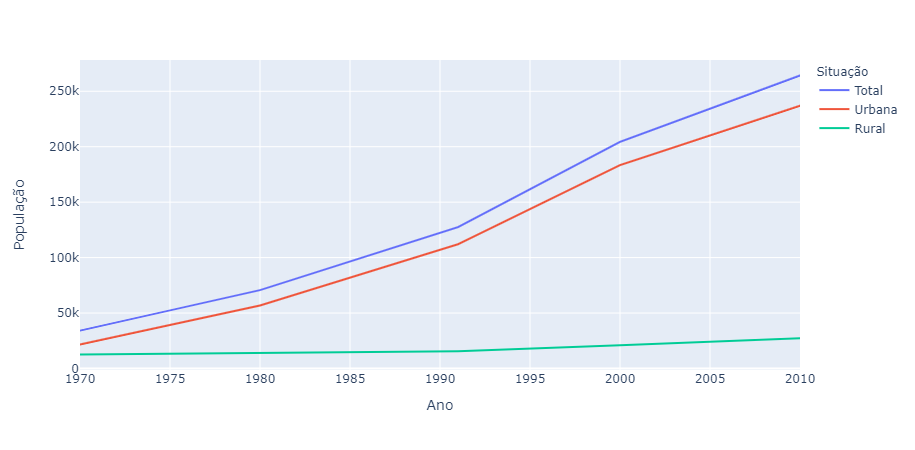

In [62]:
px.line(data_frame=pop_urb_rur_plot, x='Ano', y='População', color='Situação')

In [79]:
urb = pop_urb_rur_municipiodeinteresse['Urbana'].loc[pop_urb_rur_municipiodeinteresse['ano'] == 2010].values
total = pop_urb_rur_municipiodeinteresse['Total'].loc[pop_urb_rur_municipiodeinteresse['ano'] == 2010].values

np.round(urb / total, 4)[0] * 100

89.66

## Projeção Populacional

In [580]:
projecao_populacional = pd.read_csv('data/pop/pop_projetada_ipardes_consolidada.csv', sep= ';')

In [583]:
projecao_populacional = projecao_populacional.melt(id_vars=['codmun', 'nomemun'], var_name='Ano', value_name='População')

In [585]:
projecao_populacional.columns = ['Código', 'Município', 'Ano', 'População']

In [147]:
filtro = [False for x in range(1596)]

In [151]:
filtro[:3] = [True, True, True]

In [148]:
filtro[-3:] = [True, True, True]

In [152]:
filtro

[True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [154]:
municipiodeinteresse

4125506

In [153]:
projecao_populacional.loc[filtro]

,Código,Município,Ano,População
0,4100103,Abatiá,2010,7764
1,4100202,Adrianópolis,2010,6376
2,4100301,Agudos do Sul,2010,8270
1593,4128658,Virmond,2040,3698
1594,4128708,Vitorino,2040,6640
1595,4128807,Xambrê,2040,5516


In [168]:
filtro = projecao_populacional['Código'] == municipiodeinteresse

In [169]:
projecao_populacional_interesse = projecao_populacional.loc[filtro]

In [170]:
projecao_populacional_interesse

,Código,Município,Ano,População
93,4106902,Curitiba,2010,1751907
492,4106902,Curitiba,2020,1912757
891,4106902,Curitiba,2030,1992368
1290,4106902,Curitiba,2040,2004739


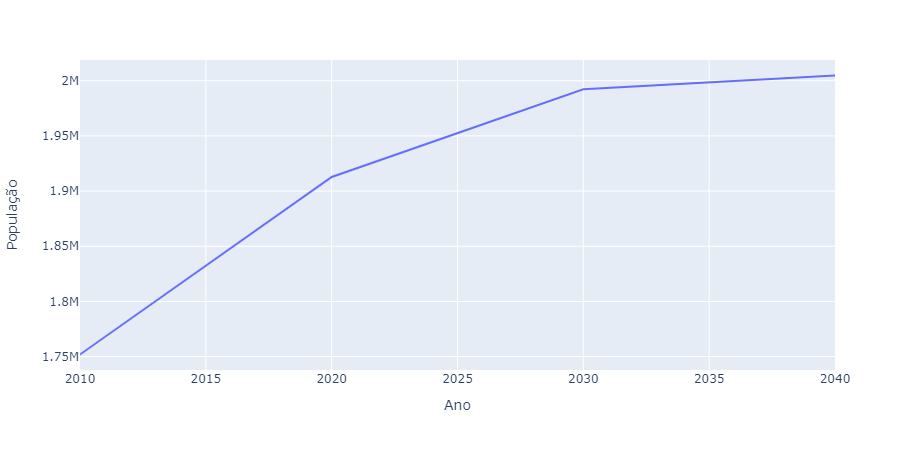

In [171]:
px.line(data_frame=projecao_populacional_interesse, x='Ano', y='População')

## Estrutura Etária

In [182]:
df_estrutura_etaria = pd.read_csv('data/pop/estruturaetaria.csv', sep=';')

In [183]:
df_estrutura_etaria

,codmun,sexo,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 24 anos,25 a 29 anos,30 a 34 anos,35 a 39 anos,40 a 44 anos,45 a 49 anos,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 anos ou mais
0,1100015,Masculino,928,1073,1256,1362,1105,1053,951,878,913,846,676,444,349,273,241,196,112
1,1100023,Masculino,3724,4177,4740,4479,4456,4161,3755,3431,3291,2613,2098,1487,1019,885,593,248,386
2,1100031,Masculino,246,253,313,317,226,250,237,242,247,213,226,143,128,101,64,36,24
3,1100049,Masculino,3039,3203,3756,3976,3796,3450,3170,2938,2815,2436,1951,1420,1064,780,596,345,388
4,1100056,Masculino,643,700,841,875,765,681,639,587,639,581,429,319,221,244,185,112,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,5222005,Feminino,395,492,562,536,517,528,569,515,452,410,310,224,217,191,122,99,112
11126,5222054,Feminino,289,282,298,312,321,316,307,278,292,211,160,163,86,72,52,18,42
11127,5222203,Feminino,214,227,237,211,225,213,185,132,141,104,79,57,43,37,15,18,9
11128,5222302,Feminino,185,255,239,237,164,193,178,160,180,157,115,137,92,58,60,26,20


In [184]:
df_estrutura_etaria = df_estrutura_etaria.melt(id_vars=['codmun', 'sexo'])

In [185]:
df_estrutura_etaria.columns

Index(['codmun', 'sexo', 'variable', 'value'], dtype='object')

In [186]:
df_estrutura_etaria.columns = ['Código', 'Sexo', 'Faixa', 'População']

In [187]:
df_estrutura_etaria

,Código,Sexo,Faixa,População
0,1100015,Masculino,0 a 4 anos,928
1,1100023,Masculino,0 a 4 anos,3724
2,1100031,Masculino,0 a 4 anos,246
3,1100049,Masculino,0 a 4 anos,3039
4,1100056,Masculino,0 a 4 anos,643
...,...,...,...,...
189205,5222005,Feminino,80 anos ou mais,112
189206,5222054,Feminino,80 anos ou mais,42
189207,5222203,Feminino,80 anos ou mais,9
189208,5222302,Feminino,80 anos ou mais,20


In [190]:
df_estrutura_etaria_interesse = df_estrutura_etaria.loc[df_estrutura_etaria['Código'] == municipiodeinteresse]

In [215]:
df_estrutura_etaria_interesse.loc[:,'População'].loc[df_estrutura_etaria_interesse['Sexo'] == 'Feminino'] *= -1 

C:\Users\augus\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [216]:
df_estrutura_etaria_interesse

,Código,Sexo,Faixa,População
4004,4106902,Masculino,0 a 4 anos,55140
9569,4106902,Feminino,0 a 4 anos,-53074
15134,4106902,Masculino,5 a 9 anos,57117
20699,4106902,Feminino,5 a 9 anos,-54737
26264,4106902,Masculino,10 a 14 anos,66202
31829,4106902,Feminino,10 a 14 anos,-63946
37394,4106902,Masculino,15 a 19 anos,69937
42959,4106902,Feminino,15 a 19 anos,-69195
48524,4106902,Masculino,20 a 24 anos,78456
54089,4106902,Feminino,20 a 24 anos,-79740


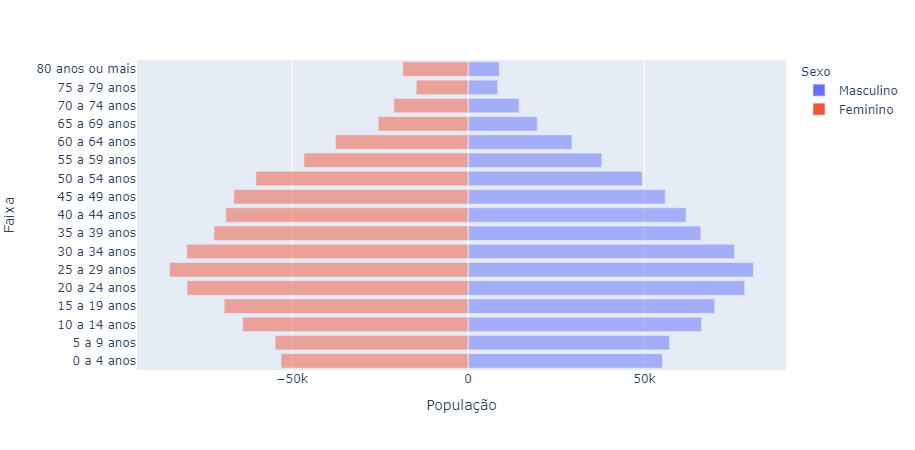

In [217]:
px.bar(data_frame=df_estrutura_etaria_interesse, y='Faixa', x='População', color='Sexo', barmode='overlay', orientation='h')

In [220]:
fig = px.bar(data_frame=df_estrutura_etaria_interesse, y='Faixa', x='População', color='Sexo', barmode='overlay', orientation='h')

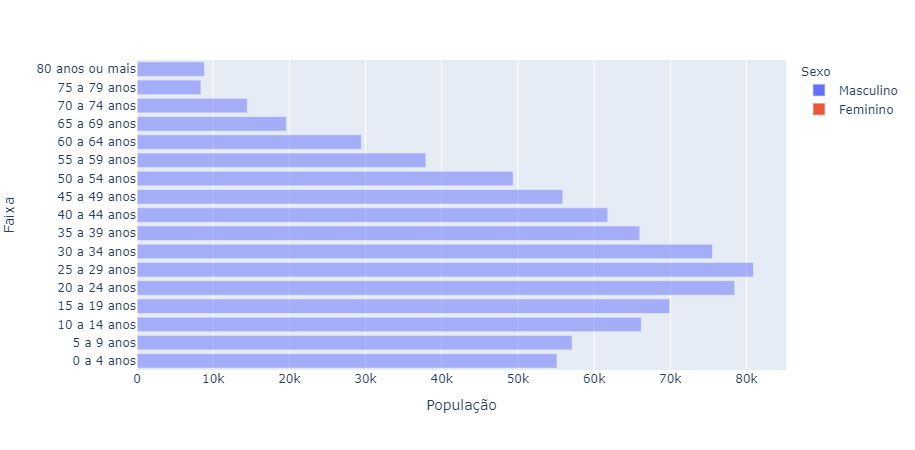

In [221]:
fig.update_xaxes(rangemode='nonnegative')

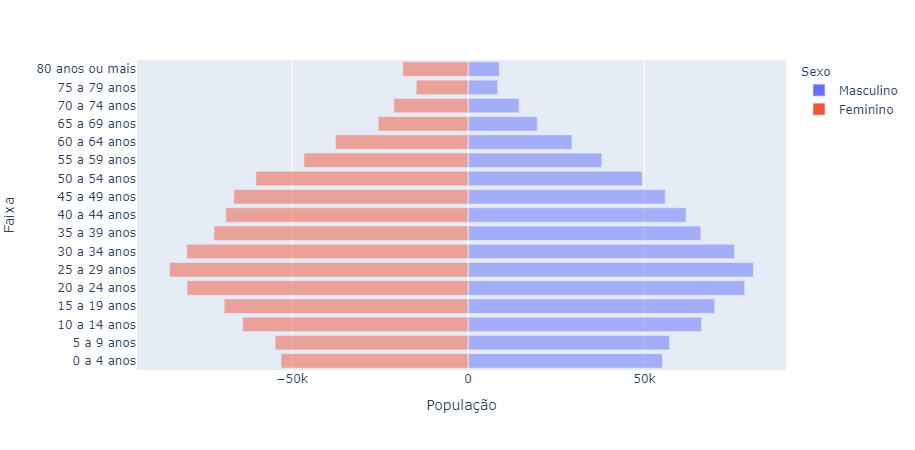

In [224]:
fig.update_xaxes(rangemode=None)

Uma boa solução para isso pode ser compor o gráfico por dois eixos X, um deles rotacionado. Parte da solução se encontra em
https://stackoverflow.com/questions/40643288/how-to-reverse-axis-values-when-using-plotly

# Code Refactoring

Agora que foram feitos os três primeiros produtos analíticos, podemos criar funções que automatizem esses procedimentos

Assim, vamos fazer funçoes que tomem o código do município de interesse e:
* carreguem e tratem os dados de crescimento populacional urbano e rural
* criem um gráfico do crescimento urbano e rural
* Apresentar o número referente ao índice de urbanização da população municipal
* carreguem e tratem os dados de projeção populacional
* gerem um gráfico da projeção populacional até 2040
* Apresente numericamente o valor da população atual
* Obtenha os dados de população segundo faixas etárias
* Faça a pirâmide etária do município no último censo

In [2]:
def load_urbrur_data():
    '''
    Loads data from the file pop_urbano_rural_total_70_10.CSV into a Pandas DataFrame. Treats the data so it can be used as an argument to devise a line plot with the plot_urbrur_growth function.
    pop_urbano_rural_total_70_10.CSV must be in the folder data/pop/.
    '''
    
    df = pd.read_csv('data/pop/pop_urbano_rural_total_70_10.CSV', sep=';', dtype={'codmun':np.int32, 'nomemun':'object', 'ano':np.int32, 'Total':np.int32, 'Urbana':np.int32, 'Rural':np.int32})
    df = df.melt(id_vars=['codmun', 'nomemun', 'ano'])
    df.columns = ['Código', 'Município', 'Ano', 'Situação', 'População']

    return df

In [11]:
df_urbrur = load_urbrur_data()

In [30]:
def plot_urbrur_growth(df=None, cod_municipio = 4125506):
    """
    Generates a line plot of the rural, urban an total population of the selected municipality.
    The df argument must be the Pandas DataFrame generated by the function load_urbrur_data.
    cod_municipio must be an integer representing the IBGE code for the municipality of interest. 
    """
    
    df = df.loc[df['Código'] ==  cod_municipio]
    fig = px.line(data_frame=df, x='Ano', y='População', color='Situação')
    
    return fig

In [37]:
fig1 = plot_urbrur_growth(df=df_urbrur, cod_municipio = 4125506)

In [38]:
fig1

In [33]:
def load_projection_data():
    """
    Loads projection data into a Pandas DataFrame to be used as an argument in the plot_projection function.
    
    """
    
    dict_types = {'codmun':np.int32, 'nomemun':'object', '2010':np.int32, '2020':np.int32, '2030':np.int32, '2040':np.int32}
    df = pd.read_csv('data/pop/pop_projetada_ipardes_consolidada.csv', sep=';', dtype=dict_types)
    df = df.melt(id_vars=['codmun', 'nomemun'])
    df.columns = ['Código', 'Município', 'Ano', 'População']
    
    return df

In [34]:
df_projection = load_projection_data()

In [35]:
def plot_projection(df=None, cod_municipio = 4125506):
    """
    Generates a line plot of the population projecte to the next decades by the IPARDES.
    The df argument must be the Pandas DataFrame generated by the load_projection_data function.
    cod_municipio must be an integer representing the IBGE code for the municipality of interest.
    
    """
    df = df.loc[df['Código'] == cod_municipio]
    df = df.sort_values(by='Ano')
    df = px.line(data_frame=df, x='Ano', y='População')
    
    return df

In [36]:
fig2 = plot_projection(df=df_projection)

In [39]:
fig2

In [494]:
def get_urbanization_index(df, cod_municipio):
    """
    Returns the urbanization index for the municipality whose IBGE code is provided in cod_municipio.
    The df argument must be the Pandas DataFrame generated by the function load_urbrur_data.
    """
    
    df = df.loc[(df['Código'] == cod_municipio) & (df['Ano'] == df['Ano'].max())]
    urban_pop = df.loc[df['Situação'] == 'Urbana']['População'].values
    total_pop =  df.loc[df['Situação'] == 'Total']['População'].values 
    urbanization_index = urban_pop / total_pop * 100    
    
    return round(urbanization_index[0], 2)

In [73]:
cod_municipio = 4125506

df_urbrur = df_urbrur.loc[df_urbrur['Código'] ==  cod_municipio]
df_projection = df_projection.loc[df_projection['Código'] == cod_municipio]
df_projection = df_projection.sort_values(by='Ano')

subplots = make_subplots(rows=1, cols=2)

df_pop_total = df_urbrur[df_urbrur['Situação'] == 'Total']
df_pop_urbana = df_urbrur[df_urbrur['Situação'] == 'Urbana']
df_pop_rural = df_urbrur[df_urbrur['Situação'] == 'Rural']


df_projection = df_projection.loc[df['Código'] == cod_municipio]

subplots.append_trace(go.Scatter(x=df_pop_total['Ano'], y=df_pop_total['População'], legendgroup = '1', name='Total'), row=1, col=1)
subplots.append_trace(go.Scatter(x=df_pop_urbana['Ano'], y=df_pop_urbana['População'], legendgroup = '1', name='Urbana'), row=1, col=1)
subplots.append_trace(go.Scatter(x=df_pop_rural['Ano'], y=df_pop_rural['População'], legendgroup = '1', name='Rural'), row=1, col=1)

subplots.append_trace(go.Scatter(x=df_projection['Ano'], y=df_projection['População'], legendgroup = '2', name='Projetada'), row=1, col=2)

subplots.for_each_xaxis()
nticks

In [100]:
subplots.update_xaxes(xaxis=dict(tickmode='array', tickvals=[2010, 2040]), ticktext=['2010', '2040'], row=0, column=0)

In [75]:
t = subplots.select_xaxes()

In [78]:
next(t)

layout.XAxis({
    'anchor': 'y2', 'domain': [0.55, 1.0]
})

In [68]:
subplots.update_layout(width=900, height=500)

In [69]:
subplots.

AttributeError: 'int' object has no attribute 'split'

In [ ]:
fig.append_trace(go.Scatter(
    x=[3, 4, 5],
    y=[1000, 1100, 1200],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=[2, 3, 4],
    y=[100, 110, 120],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=[0, 1, 2],
    y=[10, 11, 12]
), row=3, col=1)

In [495]:
get_urbanization_index(df=df, cod_municipio = 5300108)

96.54

In [101]:
def load_age_groups():
    
    dtypes = {
        'codmun': np.int32
        , 'sexo': 'category'
        , '0 a 4 anos': np.int32
        , '5 a 9 anos': np.int32
        , '10 a 14 anos': np.int32
        , '15 a 19 anos': np.int32
        , '20 a 24 anos': np.int32
        , '25 a 29 anos': np.int32
        , '30 a 34 anos': np.int32
        , '35 a 39 anos': np.int32
        , '40 a 44 anos': np.int32
        , '45 a 49 anos': np.int32
        , '50 a 54 anos': np.int32
        , '55 a 59 anos': np.int32
        , '60 a 64 anos': np.int32
        , '65 a 69 anos': np.int32
        , '70 a 74 anos': np.int32
        , '75 a 79 anos': np.int32
        , '80 anos ou mais': np.int32
    }
    
    df = pd.read_csv('data/pop/estruturaetaria.csv', sep=';')
    
    df = df.melt(id_vars=['codmun', 'sexo'])

    df.columns = ['Código', 'Sexo', 'Faixa', 'População']
    
    return df

In [132]:
df =  load_age_groups()

In [133]:
df

,Código,Sexo,Faixa,População
0,1100015,Masculino,0 a 4 anos,928
1,1100023,Masculino,0 a 4 anos,3724
2,1100031,Masculino,0 a 4 anos,246
3,1100049,Masculino,0 a 4 anos,3039
4,1100056,Masculino,0 a 4 anos,643
...,...,...,...,...
189205,5222005,Feminino,80 anos ou mais,112
189206,5222054,Feminino,80 anos ou mais,42
189207,5222203,Feminino,80 anos ou mais,9
189208,5222302,Feminino,80 anos ou mais,20


In [134]:
df = df[df['Código'] == cod_municipio]

In [135]:
subpl = subplots = make_subplots(
        rows=1
        , cols=2
        , shared_xaxes=True
        , shared_yaxes=True
        , horizontal_spacing=0.06        
        , subplot_titles=("Mulheres", "Homens"))

In [136]:
df_fm = df[df['Sexo'] == 'Feminino']['População']

In [137]:
df_faixa = df[df['Sexo'] == 'Feminino']['Faixa']

In [140]:
subplots.append_trace(go.Bar(x=df_fm, y=df_faixa), row=1, col=1)

TypeError: append_trace() got an unexpected keyword argument 'orientation'

In [139]:
subplots

In [ ]:
subplots.append_trace(go.Scatter(x=df_pop_urbana['Ano'], y=df_pop_urbana['População'], legendgroup = '1', name='Urbana'), row=1, col=1)
subplots.append_trace(go.Scatter(x=df_pop_rural['Ano'], y=df_pop_rural['População'], legendgroup = '1', name='Rural'), row=1, col=1)

subplots.append_trace(go.Scatter(x=df_projection['Ano'], y=df_projection['População'], legendgroup = '2', name='Projetada'), row=1, col=2)

In [13]:
def plot_pop_pyramid(df, cod_municipio):
    
    df = df.loc[df['Código'] == cod_municipio]
    df.loc[:,'População'].loc[df['Sexo'] == 'Feminino'] *= -1;
    
    fig = px.bar(data_frame=df, y='Faixa', x='População', color='Sexo', orientation='h', barmode='overlay');
    
    return fig;

In [14]:
fig = plot_pop_pyramid(df=df, cod_municipio = 4106902);

C:\Users\augus\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



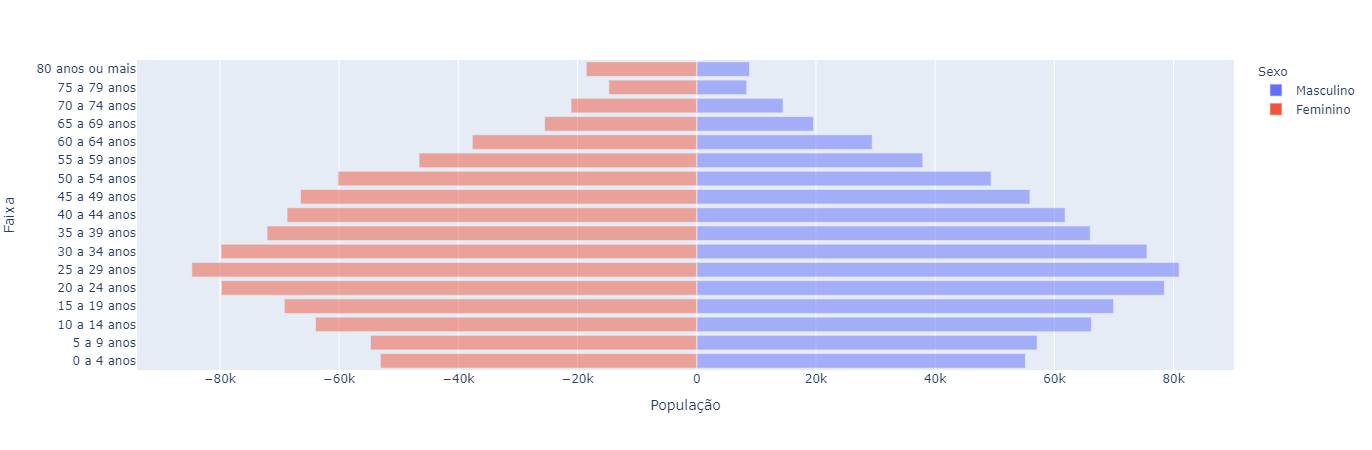

In [15]:
fig

In [47]:
df

,Código,Município,Ano,População
0,4100103,Abatiá,2010,7764
1,4100202,Adrianópolis,2010,6376
2,4100301,Agudos do Sul,2010,8270
3,4100400,Almirante Tamandaré,2010,103204
4,4100459,Altamira do Paraná,2010,4306
...,...,...,...,...
1591,4128625,Alto Paraíso,2040,3044
1592,4128633,Doutor Ulysses,2040,5822
1593,4128658,Virmond,2040,3698
1594,4128708,Vitorino,2040,6640


In [48]:
cod_municipio = 4125506

In [49]:
df = df.loc[df['Código'] == cod_municipio]
df = df.sort_values(by='Ano')

In [51]:
df['Ano'].min()

df['Ano'].max()

In [42]:
import streamlit as st

In [52]:
from PIL import image

ImportError: cannot import name 'image'

In [61]:
municipios = pd.read_csv('data/territorio/municipios_brasileiros.csv', sep=';')

municipios[municipios['cod'] == cod_municipio]['municipio'].values[0]

In [64]:
from PIL import Image

In [65]:
Image.open('imagens/urbtec.png')

UnidentifiedImageError: cannot identify image file 'imagens/urbtec.png'